# Data Analysis



A dataset has been stored in the file `fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset used for this assignment. Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)


1. Python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is shaded.
2. Overlays a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.


The data been given is near **Ann Arbor, Michigan, United States**

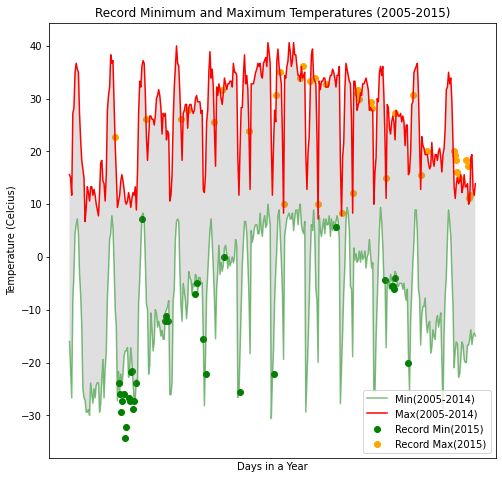

In [1]:
import matplotlib.pyplot as plt1
import mplleaflet
import pandas as pd
import numpy as np
df1=pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df=df1
df1['Date']=df1['Date'].apply(lambda x:pd.to_datetime(x))
df1['Data_Value'] = df1['Data_Value']*0.1

df1['Year'] = df1['Date'].dt.year

df1['Month_Day'] = df1['Date'].dt.strftime('%m-%d')

# Remove February 29:
df1 = df1[df1['Month_Day']!='02-29']
    #df1['Date']=pd.DatetimeIndex(df1['Date']).year
df1=df1.sort_values(['Date','ID','Element']).reset_index()
df1=df1.drop(['index'],axis=1)
    #df_min=pd.melt(df1,['Date','Element'],['Data_Value'])  
df_min1=df1[df1['Element']=='TMIN']
df_max=df1[df1['Element']=='TMAX']
x=np.arange('2015-01-01','2016-01-01', dtype='datetime64')
df_min_2014=df_min1[df_min1['Date']<=pd.to_datetime('2014-12-31')]
df_max_2014=df_max[df_max['Date']<=pd.to_datetime('2014-12-31')]
daily_min_2014=df_min_2014.groupby(['Month_Day'])['Data_Value'].min()
daily_max_2014=df_max_2014.groupby(['Month_Day'])['Data_Value'].max()
daily_min_2014.index=x
daily_max_2014.index=x
min_2015=df_min1[df_min1['Date']>pd.to_datetime('2014-12-31')]
max_2015=df_max[df_max['Date']>pd.to_datetime('2014-12-31')]
min_2015=min_2015.set_index('Date')
max_2015=max_2015.set_index('Date')
    #x=daily_min_2014.index.values.str.extract("(.*)(?=T)")
    #y=[]
#df_min_2014 = df_min_2014.merge(daily_min_2014.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day', how='left')
#df_max_2014 = df_max_2014.merge(daily_max_2014.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day', how='left')
#record_high = data[(data.Year==2015)&(data.Data_Value > data.Max_temp)]
#record_low = data[(data.Year==2015)&(data.Data_Value < data.Min_temp)]
min_2015_val=min_2015.groupby(['Month_Day'])['Data_Value'].min()
min_2015_val.index=x
max_2015_val=max_2015.groupby(['Month_Day'])['Data_Value'].max()
max_2015_val.index=x
mak=min_2015_val<daily_min_2014
mak2=max_2015_val>daily_max_2014
min_2015_val=min_2015_val[mak]
max_2015_val=max_2015_val[mak2]

plt1.figure(figsize=(8,8))  
plt1.plot(daily_min_2014,color='g',alpha=0.50)
plt1.plot(daily_max_2014,color='r')
plt1.scatter(min_2015_val.index,min_2015_val,color='green')
plt1.scatter(max_2015_val.index,max_2015_val,color='orange')
plt1.title("Record Minimum and Maximum Temperatures (2005-2015)")
plt1.xlabel("Days in a Year")
plt1.ylabel("Temperature (Celcius)")
plt1.fill_between(x, daily_max_2014, daily_min_2014, facecolor='grey', alpha=0.25)
plt1.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt1.legend(['Min(2005-2014)','Max(2005-2014)','Record Min(2015)','Record Max(2015)'])
plt1.show()